<a href="https://colab.research.google.com/github/SudhanAnnamalai/projects_to_handle/blob/master/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Referenced From ** https://thecleverprogrammer.com/2022/11/14/a-b-testing-using-python/



In [8]:
import pandas as pd
from datetime import date, timedelta #I don't know why I am importing this [Learning Scope]
import datetime # To manipulate Date time formats
import plotly.graph_objects as go # No idea bro; need to learn [Learning Scope]
import plotly.express as px # what this px function does? [Learning Scope]
import plotly.io as pio # I think it could give me an option to explore I/O functions [Learning Scope]
pio.templates.default = 'plotly_white' #[I did observational error, I should focus more on details]

In [2]:
# Downloading the Necessary files with wget 
!wget https://statso.io/wp-content/uploads/2022/11/archive.zip

--2022-12-30 00:26:53--  https://statso.io/wp-content/uploads/2022/11/archive.zip
Resolving statso.io (statso.io)... 192.0.78.25, 192.0.78.24
Connecting to statso.io (statso.io)|192.0.78.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2116 (2.1K) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]   2.07K  --.-KB/s    in 0s      

2022-12-30 00:26:53 (43.6 MB/s) - ‘archive.zip’ saved [2116/2116]



In [3]:
#unzip function might work! for the above file
!unzip archive.zip

Archive:  archive.zip
  inflating: control_group.csv       
  inflating: test_group.csv          


In [4]:
#removing the zip file with -rm
!rm archive.zip

In [5]:
# I will be exploring the file control_group.csv and its format with -cat 
!cat control_group.csv | head -5

Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
Control Campaign;1.08.2019;2280;82702;56930;7016;2290;2159;1819;618
Control Campaign;2.08.2019;1757;121040;102513;8110;2033;1841;1219;511
Control Campaign;3.08.2019;2343;131711;110862;6508;1737;1549;1134;372
Control Campaign;4.08.2019;1940;72878;61235;3065;1042;982;1183;340


#The file seems to be have delimiter as ";"

In [6]:
!cat test_group.csv | head -5

Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
Test Campaign;1.08.2019;3008;39550;35820;3038;1946;1069;894;255
Test Campaign;2.08.2019;2542;100719;91236;4657;2359;1548;879;677
Test Campaign;3.08.2019;2365;70263;45198;7885;2572;2367;1268;578
Test Campaign;4.08.2019;2710;78451;25937;4216;2216;1437;566;340


In [9]:
# Creating a Dataframe for both control and test data.

Control = pd.read_csv('control_group.csv',sep = ';')
Test = pd.read_csv('test_group.csv',sep = ';')

In [10]:
#Checking the data in Dataframe format
print(Control.head())

      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
3   

In [11]:
print(Test.head())

   Campaign Name       Date  Spend [USD]  # of Impressions  Reach  \
0  Test Campaign  1.08.2019         3008             39550  35820   
1  Test Campaign  2.08.2019         2542            100719  91236   
2  Test Campaign  3.08.2019         2365             70263  45198   
3  Test Campaign  4.08.2019         2710             78451  25937   
4  Test Campaign  5.08.2019         2297            114295  95138   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0                 3038           1946               1069               894   
1                 4657           2359               1548               879   
2                 7885           2572               2367              1268   
3                 4216           2216               1437               566   
4                 5863           2106                858               956   

   # of Purchase  
0            255  
1            677  
2            578  
3            340  
4            768  


##Column name seems to weird

In [13]:
#Checking Column names 
Control.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [14]:
Test.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [15]:
#Changing the Column names for better use in Both Control and Test

Control.columns = ['Campaign_Name', 'Date', 'Amount Spent', 'Number of Impressions', 'Reach',
       'Website Clicks', 'Searches_Received', 'Content Viewed',
       'Add_to_Cart', 'Purchases']

Test.columns = ['Campaign_Name', 'Date', 'Amount Spent', 'Number of Impressions', 'Reach',
       'Website Clicks', 'Searches_Received', 'Content Viewed',
       'Add_to_Cart', 'Purchases']

In [17]:
print(Control.head())

      Campaign_Name       Date  Amount Spent  Number of Impressions     Reach  \
0  Control Campaign  1.08.2019          2280                82702.0   56930.0   
1  Control Campaign  2.08.2019          1757               121040.0  102513.0   
2  Control Campaign  3.08.2019          2343               131711.0  110862.0   
3  Control Campaign  4.08.2019          1940                72878.0   61235.0   
4  Control Campaign  5.08.2019          1835                    NaN       NaN   

   Website Clicks  Searches_Received  Content Viewed  Add_to_Cart  Purchases  
0          7016.0             2290.0          2159.0       1819.0      618.0  
1          8110.0             2033.0          1841.0       1219.0      511.0  
2          6508.0             1737.0          1549.0       1134.0      372.0  
3          3065.0             1042.0           982.0       1183.0      340.0  
4             NaN                NaN             NaN          NaN        NaN  


In [18]:
#Checking number of null values in Control
Control.isnull().sum()

Campaign_Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches_Received        1
Content Viewed           1
Add_to_Cart              1
Purchases                1
dtype: int64

In [19]:
#Checking number of null values in Test
Test.isnull().sum()

Campaign_Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches_Received        0
Content Viewed           0
Add_to_Cart              0
Purchases                0
dtype: int64

As there are null values in Control, we will be setting mean of the column in null values; But I need to learn why we set mean for null values [ Learning Scope]

In [25]:
for i in Control.columns :
  if Control[i].isnull().sum() != 0:
    Control[i].fillna(value = Control[i].mean(), inplace = True) # For mean we always add "()"; 
#fill_na only takes the values as "value"

In [26]:
#Now we can check the Control for null values
Control.isnull().sum()

Campaign_Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches_Received        0
Content Viewed           0
Add_to_Cart              0
Purchases                0
dtype: int64

In [27]:
!wget https://www.dofactory.com/img/sql/sql-outer-joins.png

--2022-12-30 00:51:35--  https://www.dofactory.com/img/sql/sql-outer-joins.png
Resolving www.dofactory.com (www.dofactory.com)... 199.233.255.65
Connecting to www.dofactory.com (www.dofactory.com)|199.233.255.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43165 (42K) [image/png]
Saving to: ‘sql-outer-joins.png’

sql-outer-joins.png 100%[===================>]  42.15K  --.-KB/s    in 0.1s    

2022-12-30 00:51:35 (297 KB/s) - ‘sql-outer-joins.png’ saved [43165/43165]



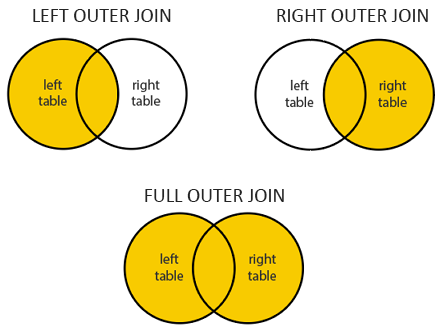

Now we can join both Control and Test using Outer Join

In [29]:
ab_data = Control.merge(Test, how = 'outer').sort_values(["Date"])

ab_data = ab_data.reset_index(drop=True) # [ Leraning Scope]

print(ab_data.head())

      Campaign_Name        Date  Amount Spent  Number of Impressions    Reach  \
0  Control Campaign   1.08.2019          2280                82702.0  56930.0   
1     Test Campaign   1.08.2019          3008                39550.0  35820.0   
2     Test Campaign  10.08.2019          2790                95054.0  79632.0   
3  Control Campaign  10.08.2019          2149               117624.0  91257.0   
4     Test Campaign  11.08.2019          2420                83633.0  71286.0   

   Website Clicks  Searches_Received  Content Viewed  Add_to_Cart  Purchases  
0          7016.0             2290.0          2159.0       1819.0      618.0  
1          3038.0             1946.0          1069.0        894.0      255.0  
2          8125.0             2312.0          1804.0        424.0      275.0  
3          2277.0             2475.0          1984.0       1629.0      734.0  
4          3750.0             2893.0          2617.0       1075.0      668.0  


In [31]:
print(ab_data["Campaign_Name"].value_counts()) #Value Counts will return number of each ditinct values

Control Campaign    30
Test Campaign       30
Name: Campaign_Name, dtype: int64


In [32]:
#Plotting data for Impression and Amount Spent for Control and Test
Figure = px.scatter(ab_data, x = 'Number of Impressions', y = 'Amount Spent', size = 'Amount Spent',
                    trendline = 'ols', color = 'Campaign_Name')
Figure.show()

# The Control Campaign seem to have more impressions with less amount spent

In [34]:
# [ LEARNING SCOPE]
labels = ['Total Seraches from Control', 'Total Seraches from Test']

counts = [sum(Control['Searches_Received']), sum(Test['Searches_Received'])]

colors = ['gold','lightgreen']

fig = go.Figure(data= [go.Pie(labels = labels, values = counts)])
fig.update_layout(title_text = 'Control vs Test : Searches')
fig.update_traces(hoverinfo = 'label+percent', textinfo='value', textfont_size = 30,
                  marker = dict(colors = colors, line = dict(color = 'black', width = 3)))

fig.show()


In [35]:
# [ LEARNING SCOPE]
labels = ['Total Clicks from Control', 'Total Clicks raches from Test']

counts = [sum(Control['Website Clicks']), sum(Test['Website Clicks'])]

colors = ['gold','lightgreen']

fig = go.Figure(data= [go.Pie(labels = labels, values = counts)])
fig.update_layout(title_text = 'Control vs Test : Searches')
fig.update_traces(hoverinfo = 'label+percent', textinfo='value', textfont_size = 30,
                  marker = dict(colors = colors, line = dict(color = 'black', width = 3)))

fig.show()


In [36]:
# [ LEARNING SCOPE]
labels = ['Total Content Viewed from Control', 'Total Content Viewed from Test']

counts = [sum(Control['Content Viewed']), sum(Test['Content Viewed'])]

colors = ['gold','lightgreen']

fig = go.Figure(data= [go.Pie(labels = labels, values = counts)])
fig.update_layout(title_text = 'Control vs Test : Searches')
fig.update_traces(hoverinfo = 'label+percent', textinfo='value', textfont_size = 30,
                  marker = dict(colors = colors, line = dict(color = 'black', width = 3)))

fig.show()

In [37]:
# [ LEARNING SCOPE]
labels = ['Total RATIO OF CLICKED VS VIEWED from Control', 'Total RATIO OF CLICKED VS VIEWED from Test']

counts = [sum(Control['Website Clicks'])/sum(Control['Content Viewed']), sum(Test['Website Clicks'])/sum(Test['Content Viewed'])]

colors = ['gold','lightgreen']

fig = go.Figure(data= [go.Pie(labels = labels, values = counts)])
fig.update_layout(title_text = 'Control vs Test : Cicked vs Viewed Ratio')
fig.update_traces(hoverinfo = 'label+percent', textinfo='value', textfont_size = 30,
                  marker = dict(colors = colors, line = dict(color = 'black', width = 3)))

fig.show()

In [38]:
# [ LEARNING SCOPE]
labels = ['Products Added to Cart from Control', 'Products Added to Cart from Test']

counts = [sum(Control['Add_to_Cart']), sum(Test['Add_to_Cart'])]

colors = ['gold','lightgreen']

fig = go.Figure(data= [go.Pie(labels = labels, values = counts)])
fig.update_layout(title_text = 'Control vs Test : Cicked vs Viewed Ratio')
fig.update_traces(hoverinfo = 'label+percent', textinfo='value', textfont_size = 30,
                  marker = dict(colors = colors, line = dict(color = 'black', width = 3)))

fig.show()

In [40]:
label = ["Amount Spent in Control Campaign", 
         "Amount Spent in Test Campaign"]
counts = [sum(Control["Amount Spent"]), 
          sum(Test["Amount Spent"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Amount Spent')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

In [41]:
label = ["Purchases Made by Control Campaign", 
         "Purchases Made by Test Campaign"]
counts = [sum(Control["Purchases"]), 
          sum(Test["Purchases"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Purchases')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

In [42]:
ab_data.columns

Index(['Campaign_Name', 'Date', 'Amount Spent', 'Number of Impressions',
       'Reach', 'Website Clicks', 'Searches_Received', 'Content Viewed',
       'Add_to_Cart', 'Purchases'],
      dtype='object')

In [43]:
fig = px.scatter(ab_data, x = 'Content Viewed', y ='Website Clicks', size = 'Website Clicks', 
                 color = 'Campaign_Name', trendline = 'ols')

fig.show()

In [44]:
fig = px.scatter(ab_data, x = 'Add_to_Cart', y ='Content Viewed', size = 'Add_to_Cart', 
                 color = 'Campaign_Name', trendline = 'ols')

fig.show()

In [45]:
fig = px.scatter(ab_data, x = 'Purchases', y ='Add_to_Cart', size = 'Purchases', 
                 color = 'Campaign_Name', trendline = 'ols')

fig.show()

Campaign_Name_x   Date        Amount Spent_x  Number of Impressions_x  Reach_x        Website Clicks_x  Searches_Received_x  Content Viewed_x  Add_to_Cart_x  Purchases_x  Campaign_Name_y  Amount Spent_y  Number of Impressions_y  Reach_y  Website Clicks_y  Searches_Received_y  Content Viewed_y  Add_to_Cart_y  Purchases_y
Control Campaign  1.08.2019   2280            82702.000000             56930.000000   7016.000000       2290.000000          2159.000000       1819.0         618.000000   Test Campaign    3008            39550                    35820    3038              1946                 1069              894            255            1
                  10.08.2019  2149            117624.000000            91257.000000   2277.000000       2475.000000          1984.000000       1629.0         734.000000   Test Campaign    2790            95054                    79632    8125              2312                 1804              424            275            1
                  8.08.2